![](../assets/header_image.png)

# Optional Assignment 4: Introduction to Jupyter-ROS for the live plotting of signals in the jupyter notebook


Welcome to an optional assignment! 
This exercise notebook is optional. That means we only recommend this notebook to students who do *not* have expierenced with
- **Jupyter-ROS**
- **Robot Operating system(ROS)**



In this assignment, you will 

- **Learn how the JupyROS can allow us to use ROS with the Jupyter Notebooks**
- **How can we plot and monitor the signals from the jupyter notebook that are being publsihed over certain ros topic in the ros environment**


# Set up the ROS environment

This command is used to set up the environment for the ROS (Robot Operating System) Noetic distribution. It sets up various environment variables, such as ROS_PACKAGE_PATH, that are necessary for using ROS commands and accessing the packages and libraries included with the Noetic distribution. 

By sourcing this file, the user can use the ROS commands and work with the Noetic distribution without having to manually set the environment variables each time.



In [1]:
!source /opt/ros/noetic/setup.sh

# Adding the ROS python library path to the system's path variables

This code is used to add the path of the ROS Noetic distribution's python library to the system's path variable.
The sys.path variable is a list of strings that determines the interpreter's search path for modules. 
By appending the path of the ROS Noetic python library to this list, the interpreter will be able to find and import any modules or packages included in the library when a script runs. This is useful for using ROS functions and modules within a Python script.

In [2]:
import sys
sys.path.append('/opt/ros/noetic/lib/python3/dist-packages/')

# Importing the libaries specific to the ROS and ROS Messages

JupyROS is a library that allows using ROS within Jupyter Notebooks. 
It provides a set of API to interact with ROS, in a similar way as it's done in Python scripts. JupyROS allows to create, publish, subscribe, etc. to topics and services.

In [3]:
import math
import rospy
import jupyros
from geometry_msgs.msg import Vector3

# Now, it is time to launch the master node from the Terminal

For that follow the steps as following,

1. click on

- **File >> New >> Terminal**

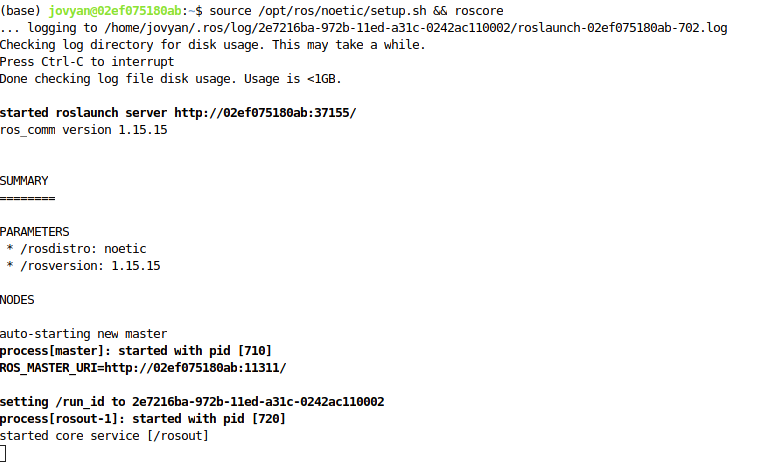

2. Setup the ROS environment again and launch the 'roscore' command as follows,


```bash
source /opt/ros/noetic/setup.sh && roscore
```

# Initialize the ROS node 

Using rospy libary and it would register the node 'runner' with the master node running in the Terminal

In [ ]:
rospy.init_node('runner')

Unable to register with master node [http://localhost:11311/]: master may not be running yet. Will keep trying.


# Create the publisher object with rospy
This code snippet creates a publisher object that publishes a Vector3 message to the `/poser` topic at a rate of 5 times per second. The message's x and y fields are set to sine and cosine values based on the value of the variable `i`, which is incremented in each iteration of the while loop. The `rate.sleep()` function is called at the end of each iteration to ensure that the loop runs at the desired rate of 5 times per second. This code will run indefinitely until the program is interrupted.

In [ ]:
%%thread_cell
i = 0
rate = rospy.Rate(5)
pub = rospy.Publisher('/poser', Vector3, queue_size=10)
while True:
    msg = Vector3()
    msg.x = math.sin(i * 0.1)
    msg.y = math.cos(i * 0.1)
    pub.publish(msg)
    i += 1
    rate.sleep()

# Create the subscriber using the Jupyros library
This code snippet creates a subscriber to the `/poser` topic, which listens for messages of type Vector3. When a message is received, the lambda function is called with the received message as its argument, and it prints the x and y fields of the message ( `msg.x` and `msg.y`). This subscriber will keep running and listening to the `/poser` topic.

In [ ]:
jupyros.subscribe('/poser', Vector3, lambda msg: print(msg.x, msg.y))

# Create the live plot with Jupyros

It creates a live plot of the x and y fields of the Vector3 messages received on the `/poser` topic. The plot is updated in real-time as new messages are received. 

In [ ]:
jupyros.live_plot('/poser/:x:y', Vector3)

# Stop the master 

- Now you should go back to the Terminal and stop the master node by clicking ctrl+ C

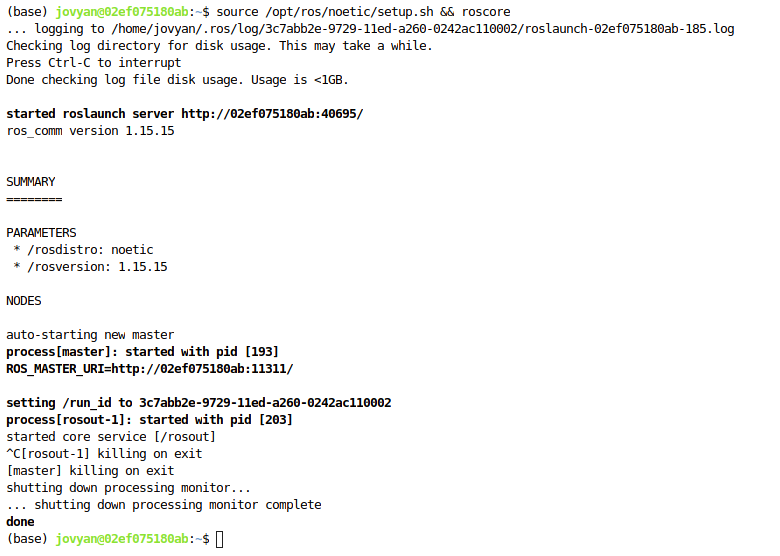

# Wrap up

- You learned about plotting the signals in the jupyter environment that are being published over some topic in the ros environment
- You learned how to launch the ROS node
- You learned how to define the publisher to a topic using the rospy library
- You learned how to define the subscriber to a topic using the jupyros library
- You learned how to launch the master node from the terminal and how to stop it

## License

MIT License

Copyright 2022 Institute for Automotive Engineering of RWTH Aachen University.